<a href="https://colab.research.google.com/github/ck1972/Python-Geospatial_Model1/blob/main/1h_Ten_Essential_Geospatial_Python_Libraries_Demonstrations_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ten Essential Geospatial Python Libraries for Beginners

# Introduction
Geospatial data analysis is vital in diverse fields such as environmental assessment, urban planning, forestry, agriculture, and climate change studies. The increasing demand for insights derived from geospatial data has driven the adoption of Python packages tailored for geographic analysis, enabling tasks like tracking climate patterns, monitoring urban growth, and mapping disease outbreaks. To ensure efficient analysis and visualization of geospatial data, it is crucial to choose tools that offer robust capabilities for processing, transforming, and presenting data effectively.


## Libraries

### 1. Geopandas
GeoPandas extends Pandas to handle geometric data types, making it indispensable for working with vector geospatial data. GeoPandas supports formats like Shapefiles and GeoJSON and offers spatial operations such as merging, grouping, and spatial joins.


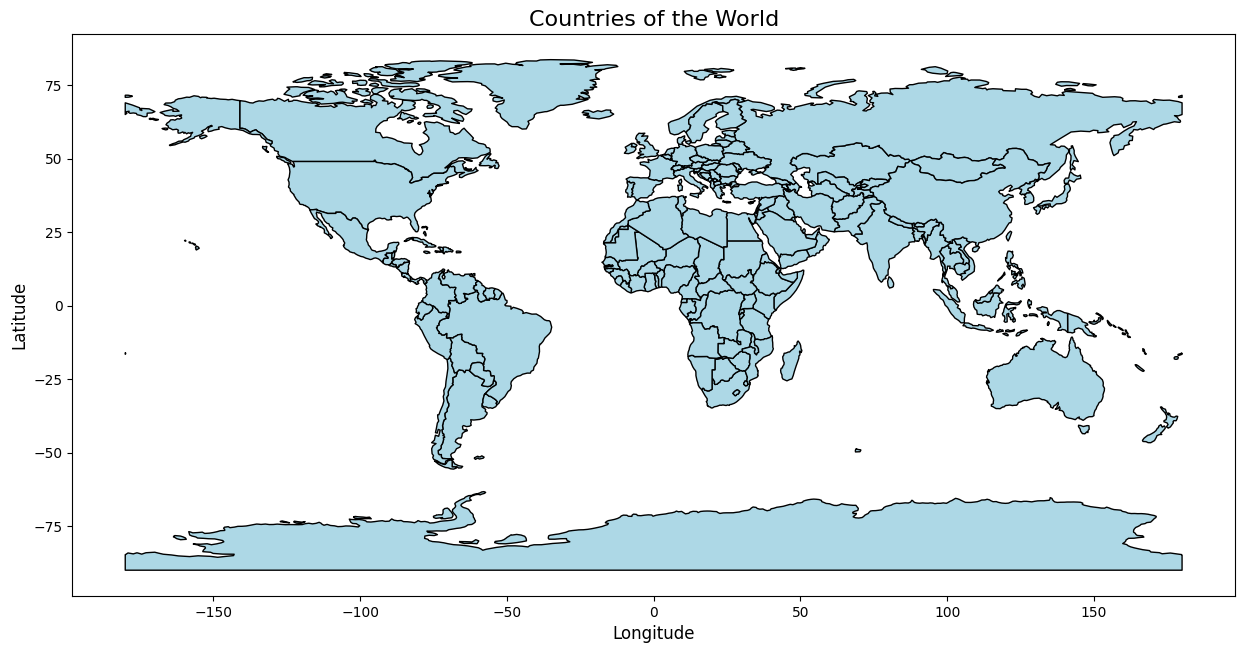

In [ ]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file from Natural Earth
url = "https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

# Plot the countries
world.plot(figsize=(15, 10), color="lightblue", edgecolor="black")
plt.title("Countries of the World", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

###2. Matplotlib
Matplotlib is a versatile Python library for creating static, animated, and interactive visualizations. It supports various plot types, including line plots, scatter plots, bar charts, histograms, pie charts, and 3D plots.Matplotlib integrates seamlessly with libraries like NumPy and Pandas and works well in Jupyter notebooks and other applications for data visualization.

                       time  latitude  longitude    depth  mag magType    nst  \
0  2024-11-27T00:05:38.239Z  -11.3039   -74.9008  113.266  4.6      mb   59.0   
1  2024-11-26T21:01:48.770Z   49.3507   155.4911   56.648  5.4     mww  119.0   
2  2024-11-26T17:19:47.379Z   37.0257   136.4128   10.000  4.9     mww   99.0   
3  2024-11-26T15:34:29.567Z  -12.0290   166.5218  138.042  4.5      mb   47.0   
4  2024-11-26T14:52:51.262Z   36.9528   136.3613    5.404  4.9     mww   94.0   

     gap   dmin   rms  ...                                  place        type  \
0   72.0  2.020  0.52  ...             19 km NW of Mariposa, Peru  earthquake   
1   49.0  4.010  0.85  ...  154 km SSW of Severo-Kuril’sk, Russia  earthquake   
2   57.0  1.516  0.80  ...              36 km WNW of Hakui, Japan  earthquake   
3  143.0  3.461  0.81  ...    164 km SSE of Lata, Solomon Islands  earthquake   
4   51.0  1.535  0.68  ...              38 km WNW of Hakui, Japan  earthquake   

  horizontalError depthErr

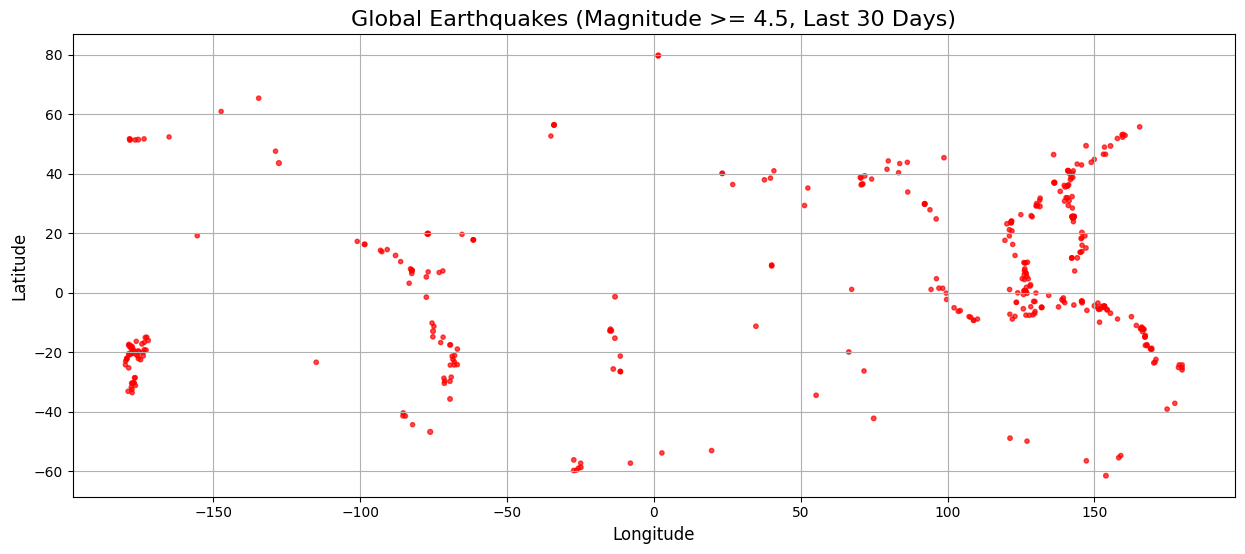

In [ ]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load earthquake data from USGS API (last 30 days, magnitude >= 4.5)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv"
earthquakes = pd.read_csv(url)

# Step 2: Convert the dataset to a GeoDataFrame
geometry = gpd.points_from_xy(earthquakes["longitude"], earthquakes["latitude"])
earthquakes_gdf = gpd.GeoDataFrame(earthquakes, geometry=geometry, crs="EPSG:4326")

# Step 3: Inspect the dataset
print(earthquakes_gdf.head())

# Step 4: Plot the earthquake locations
fig, ax = plt.subplots(figsize=(15, 10))
earthquakes_gdf.plot(ax=ax, color="red", markersize=earthquakes_gdf["mag"] * 2, alpha=0.7)

# Customize the plot
ax.set_title("Global Earthquakes (Magnitude >= 4.5, Last 30 Days)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.grid(True)

# Display the plot
plt.show()

### 3. Geemap
Geemap enhances geospatial analysis by integrating Google Earth Engine capabilities into Python. It supports interactive mapping, split-panel map creation. Geemap simplifies workflows with features like Earth Engine JavaScript-to-Python conversion, Furthermore, Geemap leverages GEE's extensive catalog of satellite imagery and geospatial datasets for local, regional, and global environmental analyses.

In [ ]:
# Import ee
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-****-test') # Change to your EE project

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


### Visualize raster data
The provided code initializes the Google Earth Engine (GEE) environment and visualizes the SRTM Digital Elevation Model (DEM) using the geemap Python library. It defines visualization parameters (vis_params) with a color palette to represent elevation ranges, where blue indicates low elevations, and white represents the highest peaks.

In [ ]:
## Import geemap library
import geemap

# Test Earth Engine
dataset = ee.Image('CGIAR/SRTM90_V4')
print('GEE Environment Set Up Successfully')

# Define visualization parameters for SRTM DEM
vis_params = {
    'min': 0,    # Minimum elevation (meters)
    'max': 3000, # Maximum elevation (meters)
    'palette': ['blue', 'green', 'yellow', 'orange', 'red', 'white'] # Color palette
}

# Create a map
Map = geemap.Map()
Map.addLayer(dataset, vis_params, 'SRTM DEM')
Map.centerObject(dataset, zoom=8)

# Add a legend to the map with RGB tuples for colors
legend_dict = {
    'Low Elevation': (0, 0, 255),         # Blue
    'Medium Elevation': (0, 128, 0),     # Green
    'High Elevation': (255, 255, 0),     # Yellow
    'Very High Elevation': (255, 165, 0),# Orange
    'Peak': (255, 0, 0),                 # Red
    'Snow/Ice': (255, 255, 255)          # White
}

Map.add_legend(legend_title='SRTM DEM Elevation', legend_dict=legend_dict)

# Display the map
Map

GEE Environment Set Up Successfully


Map(center=[30.039715544041336, 11.931649001512765], controls=(WidgetControl(options=['position', 'transparent…

### Visualize vector data
This code analyzes building footprints using Google Earth Engine (GEE). It creates a boundary geometry for Chitungwiza by defining a point and applying a 10-kilometer buffer around it. The code then loads the Global ML Building Footprints dataset for an urban areas in Zimbabwe.

In [ ]:
# Define the boundary of Chitungwiza, Zimbabwe, using coordinates
# Replace with exact geometry if needed
chitungwiza_boundary = ee.Geometry.Point([31.08, -18.012]).buffer(10000)  # 10 km buffer

# Load the Global ML Building Footprints dataset for Zimbabwe
ms_buildings = ee.FeatureCollection('projects/sat-io/open-datasets/MSBuildings/Zimbabwe')

# Filter the dataset to only include buildings within Chitungwiza
chitungwiza_buildings = ms_buildings.filterBounds(chitungwiza_boundary)

# Print the number of building footprints in Chitungwiza
building_count = chitungwiza_buildings.size().getInfo()
print(f"Number of buildings in Chitungwiza: {building_count}")

Number of buildings in Chitungwiza: 93597


Display the building footprints.

In [ ]:
# Visualize the building footprints on a map
# Prepare style the buildings
styled_buildings = chitungwiza_buildings.style(
    color='FF5500',  # Building outline color
    fillColor='00000000'  # Transparent fill
)

# Initialize our map.
map1 = geemap.Map()
map1.centerObject(chitungwiza_buildings, 12)

# Add layers to the map
map1.addLayer(styled_buildings, {}, 'Chitungwiza Buildings')
map1.setOptions('SATELLITE')  # Use satellite basemap

# Display the map with layer control.
map1.addLayerControl()
map1

Map(center=[-18.010479741694663, 31.072453420136217], controls=(WidgetControl(options=['position', 'transparen…

### 4. Rasterio
Rasterio is a powerful library for handling geospatial raster data. It offers efficient performance for operations like cropping, reprojecting, and resampling, making it a go-to tool for raster data processing.


In [ ]:
# Install rasterio
!pip install rasterio

Import the necessary libraries.

In [ ]:
# Import libraries
import rasterio
from rasterio.plot import show
from google.colab import drive

Mount Google Drive to access your satellite imagery.

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
IMAGE_PATH = '/content/drive/My Drive/Maf_Datasets/prs_S2_2021a.tif'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of bands: 8
CRS: EPSG:32735
Transform: | 10.00, 0.00, 664110.00|
| 0.00,-10.00, 7972210.00|
| 0.00, 0.00, 1.00|


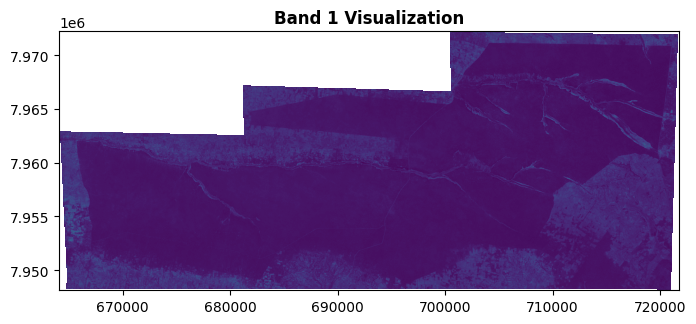

In [ ]:
# Open raster data using Rasterio
with rasterio.open(IMAGE_PATH) as src:
    band_count = src.count
    crs = src.crs
    transform = src.transform
    data = src.read()

# Display raster metadata
print(f"Number of bands: {band_count}")
print(f"CRS: {crs}")
print(f"Transform: {transform}")

# Visualize the first band
plt.figure(figsize=(8, 8))
show(data[0], transform=transform, title="Band 1 Visualization")
plt.show()

### 5. Earthpy
Earthpy simplifies plotting and working with spatial raster data in Python. Building on libraries like Rasterio and Matplotlib, it makes geospatial data visualization more accessible.


In [ ]:
# Install earthpy
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


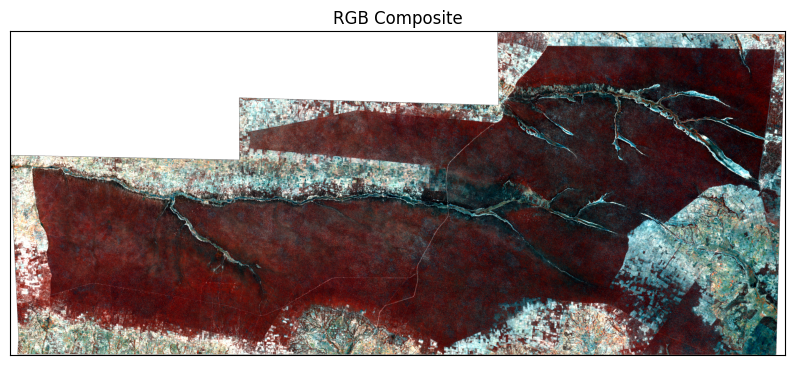

<Axes: title={'center': 'RGB Composite'}>

In [ ]:
# Import the libraries
import earthpy.plot as ep

# Stack bands for RGB visualization
image_vis = np.stack([data[3], data[2], data[1]])  # Bands 4, 3, 2 (RGB)

# Plot using Earthpy
ep.plot_rgb(image_vis, figsize=(10, 10), stretch=True, title="RGB Composite")

### 6. NumPy
NumPy provides the array data structure that many geospatial libraries use to represent and manipulate raster data. It is important for raster data analysis, offering a foundation for numerical operations.

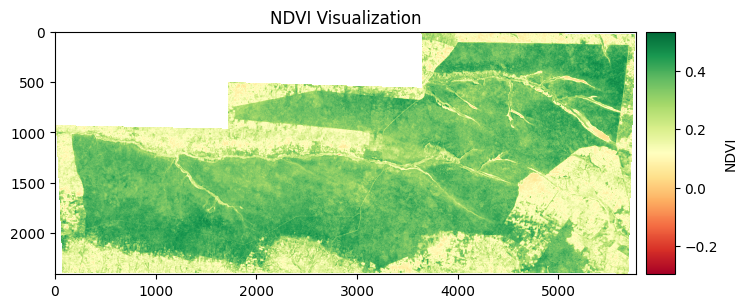

In [ ]:
# Import libraries
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Calculate NDVI (Normalized Difference Vegetation Index)
ndvi = (data[3] - data[2]) / (data[3] + data[2])  # (NIR - Red) / (NIR + Red)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Display the NDVI
im = ax.imshow(ndvi, cmap='RdYlGn')
ax.set_title("NDVI Visualization")

# Create a divider for the axis to adjust the colorbar size
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add the colorbar to the adjusted axis
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("NDVI")

plt.show()

### 7. GDAL (Geospatial Data Abstraction Library)
GDAL is the backbone for many geospatial libraries, including Rasterio. It supports a wide range of raster formats and provides essential functionality for raster data processing.

Raster Size: 5769 x 2409
Projection: PROJCS["WGS 84 / UTM zone 35S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32735"]]
Geotransform: (664110.0, 10.0, 0.0, 7972210.0, 0.0, -10.0)


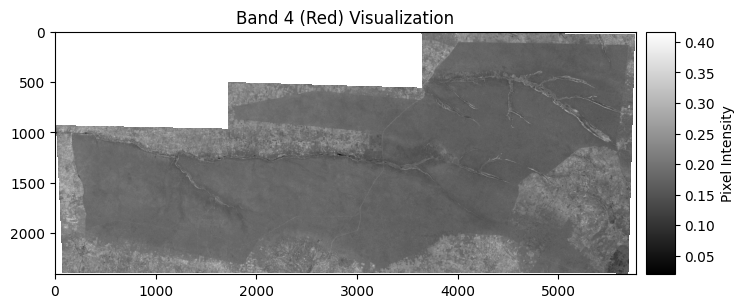

In [ ]:
# Install gdal
from osgeo import gdal

# Open the raster file using GDAL
dataset = gdal.Open(IMAGE_PATH)

# Get raster band (e.g., Band 4: Red)
band4 = dataset.GetRasterBand(4)  # Assuming Band 4 is the Red band
band4_data = band4.ReadAsArray()  # Read as NumPy array

# Get metadata
print(f"Raster Size: {dataset.RasterXSize} x {dataset.RasterYSize}")
print(f"Projection: {dataset.GetProjection()}")
print(f"Geotransform: {dataset.GetGeoTransform()}")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Display the raster data
im = ax.imshow(band4_data, cmap='gray')
ax.set_title('Band 4 (Red) Visualization')

# Create a divider for the axis to adjust the colorbar size
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add the colorbar to the adjusted axis
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('Pixel Intensity')

plt.show()

### 8.SciPy
SciPy complements NumPy by providing additional scientific computing tools useful for advanced raster analysis and processing, enhancing your analytical capabilities.


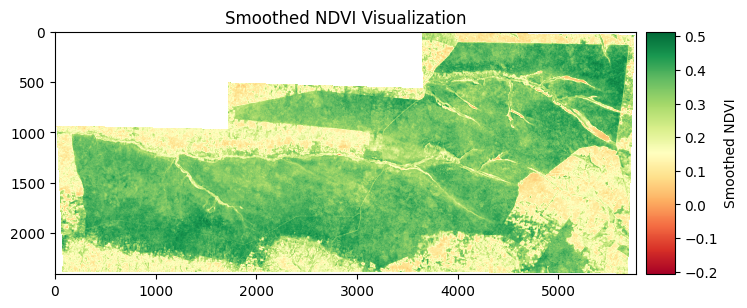

In [ ]:
# Import library
from scipy.ndimage import gaussian_filter

# Smooth NDVI with Gaussian Filter
smoothed_ndvi = gaussian_filter(ndvi, sigma=1)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Display the smoothed NDVI
im = ax.imshow(smoothed_ndvi, cmap='RdYlGn')
ax.set_title("Smoothed NDVI Visualization")

# Create a divider for the axis to adjust the colorbar size
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add the colorbar to the adjusted axis
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("Smoothed NDVI")

plt.show()

## 9. Scikit-Image
Scikit-image offers image processing algorithms that can be applied to raster data for various analyses and transformations, aiding in detailed geospatial data examination.

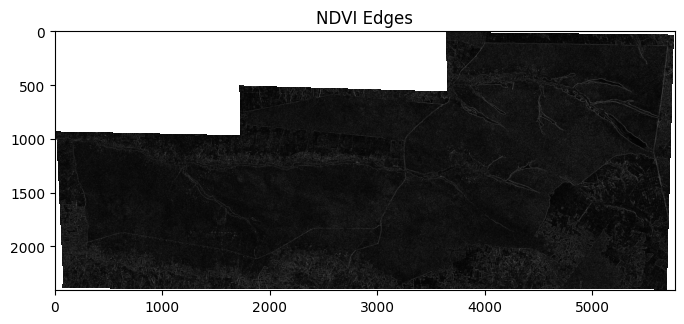

In [ ]:
# Import skimage
from skimage.filters import sobel

# Apply Sobel filter for edge detection
edges = sobel(ndvi)

# Visualize edges
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title("NDVI Edges")
plt.show()

### 10. Scikit-learn
Scikit-learn provides robust tools for supervised and unsupervised classification of satellite imagery. Unsupervised methods like K-means clustering group pixels into distinct classes without labeled data,
while supervised methods like support vector machines require labeled training data.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import rasterio

# Define the image path
IMAGE_PATH = '/content/drive/My Drive/Maf_Datasets/prs_S2_2021a.tif'

# Load the raster image
with rasterio.open(IMAGE_PATH) as src:
    data = src.read()  # Read all bands
    profile = src.profile  # Store metadata
    transform = src.transform  # Store spatial transform
    crs = src.crs  # Coordinate reference system
    n_bands, n_rows, n_cols = data.shape
    print(f"Number of bands: {n_bands}")

# Reshape raster data for clustering
# Flatten the data: Each pixel becomes a sample with band values as features
flat_data = data.reshape(n_bands, -1).T  # Shape becomes (n_pixels, n_bands)

# Handle NaN values
# Option 1: Replace NaN with a constant (e.g., 0)
flat_data[np.isnan(flat_data)] = 0

# Apply KMeans clustering
n_clusters = 10  # Define number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(flat_data)

# Assign clusters to the pixels
clusters = kmeans.labels_

# Reshape clusters back to the original image shape
clustered_image = clusters.reshape(n_rows, n_cols)

Display the clustered map.

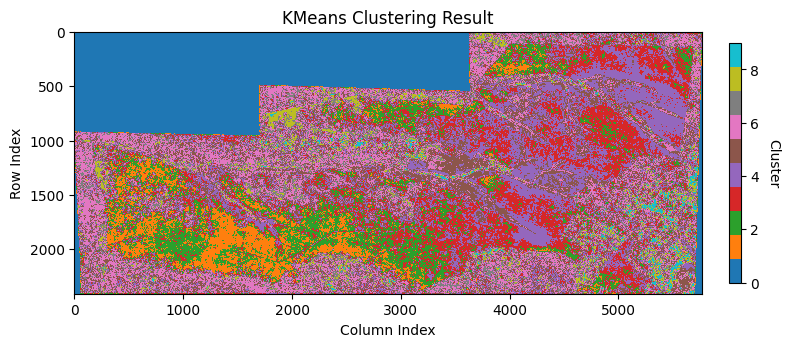

In [ ]:
# Visualize the clustering result
plt.figure(figsize=(8, 8))
im = plt.imshow(clustered_image, cmap='tab10')
plt.title("KMeans Clustering Result")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Add a smaller colorbar
cbar = plt.colorbar(im, fraction=0.018, pad=0.04)  # Adjust size and spacing
cbar.set_label("Cluster", rotation=270, labelpad=15)  # Rotate the label

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()